# Install Required Libraries

In [18]:
!pip install wordcloud
!pip install textblob

/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)
/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash

# Import Necessary Libraries

In [19]:
#Numerical & Data Manipulation
import numpy as np 
import pandas as pd

#Natural Language Processing
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.stem import WordNetLemmatizer

#Text Processing & Modeling
from sklearn.feature_extraction.text import TfidfVectorizer

#Iteration & Regular Expression
import re
import itertools
from nltk.tokenize import RegexpTokenizer

#Plotting & visualization 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import seaborn as sns

# Load the dataset

In [3]:
#Read the file
df = pd.read_csv("data_preprocess.csv", encoding="latin-1")
print("Loaded data file {0} with {1} rows and {2} columns".format("data_preprocess.csv"
                                                                  ,df.shape[0]
                                                                  ,df.shape[1]))

df.head()

Loaded data file data_preprocess.csv with 89 rows and 5 columns


,Course,Type,Sub-topics,Description,Link
0,Artificial Intelligence,Courseware,Getting Started with Enterprise-grade AI,This course covers the foundations of AI for b...,https://skillsbuild.org/college-students/digit...
1,Artificial Intelligence,Courseware,OpenDS4All,OpenDS4All is a project created to accelerate ...,https://github.com/odpi/OpenDS4All/tree/master...
2,Artificial Intelligence,Courseware,IBM AI Education,Dive into this introductory course and get fam...,https://www.mindspark.org/ibm-ai
3,Artificial Intelligence,Courseware,Watson Academy,"IBMs portfolio of business-ready tools, appli...",https://www.ibm.com/training/artificial-intell...
4,Artificial Intelligence,Courseware,Create a Node-RED starter application,A flow-based programming tool for wiring toget...,https://developer.ibm.com/components/node-red/


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Course       89 non-null     object
 1   Type         89 non-null     object
 2   Sub-topics   89 non-null     object
 3   Description  89 non-null     object
 4   Link         89 non-null     object
dtypes: object(5)
memory usage: 3.6+ KB


In [5]:
# Calculate the percentage of the missing values 
(df.isnull().sum()).sort_values(ascending=False) / df.shape[0]

Course         0.0
Type           0.0
Sub-topics     0.0
Description    0.0
Link           0.0
dtype: float64

In [6]:
df = df.drop_duplicates()

In [7]:
print(df.columns)

Index(['Course', 'Type', 'Sub-topics', 'Description', 'Link '], dtype='object')


In [4]:
df.rename(columns={'Sub-topics': 'topic'}, inplace=True)

In [5]:
df.rename(columns={'Link ': 'Link'}, inplace=True)

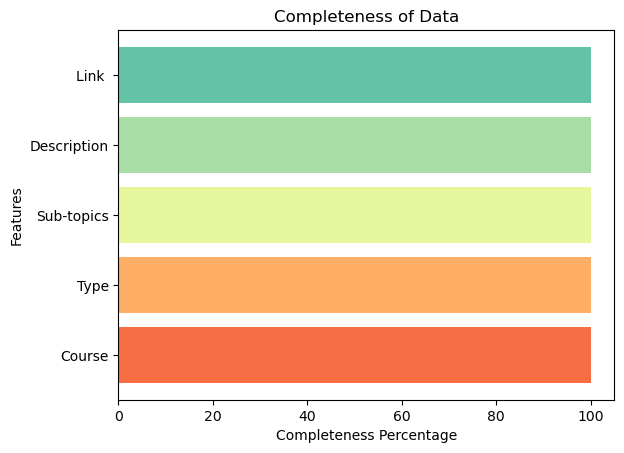

In [9]:
# Calculate the completeness percentage for each column
completeness = (1 - df.isnull().sum() / df.shape[0]) * 100

# Define the colors
colors = ['#F66D44', '#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6']

# Create a horizontal bar chart with custom colors
plt.barh(completeness.index, completeness, color=colors)
plt.xlabel('Completeness Percentage')
plt.ylabel('Features')
plt.title('Completeness of Data')
plt.show()

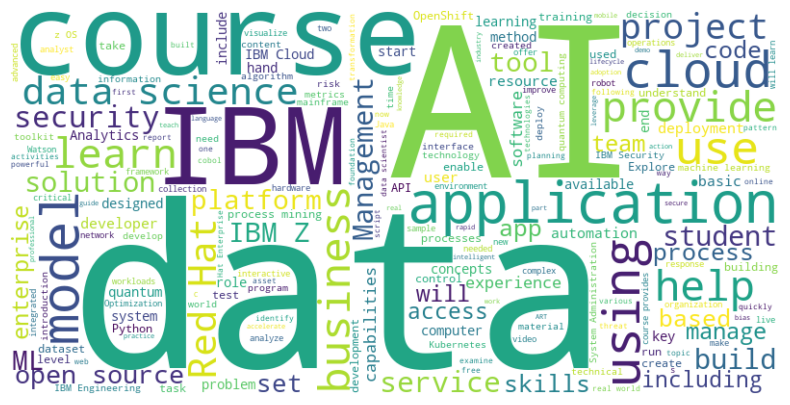

In [15]:
# Concatenate 'Description' values into a single string
text = " ".join(df['Description'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.xticks([])
plt.yticks([])

plt.savefig('original_discription.png')
plt.show()

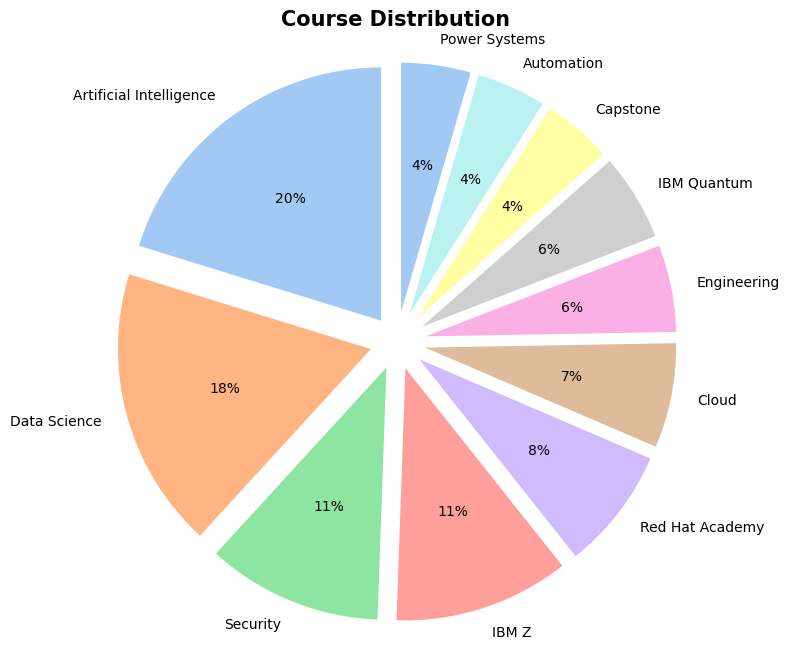

In [10]:
# Calculate the course distribution
course_counts = df['Course'].value_counts()

# Generate a palette of pastel colors with 11 different shades
pastel_palette = sns.color_palette("pastel", n_colors=11)

# Plotting the course distribution as a pie chart with pastel colors
explode = (0.1,) * len(course_counts)  # Explode all slices for emphasis

plt.figure(figsize=(8, 8))
plt.pie(course_counts, labels=course_counts.index, explode=explode, autopct='%1.0f%%', startangle=90,
        colors=pastel_palette, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Set aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')

# Add a title
plt.title('Course Distribution', fontweight='bold', fontsize=15)

# Save the plot as an image
plt.savefig('course_distribution.png')

# Show the plot
plt.show()

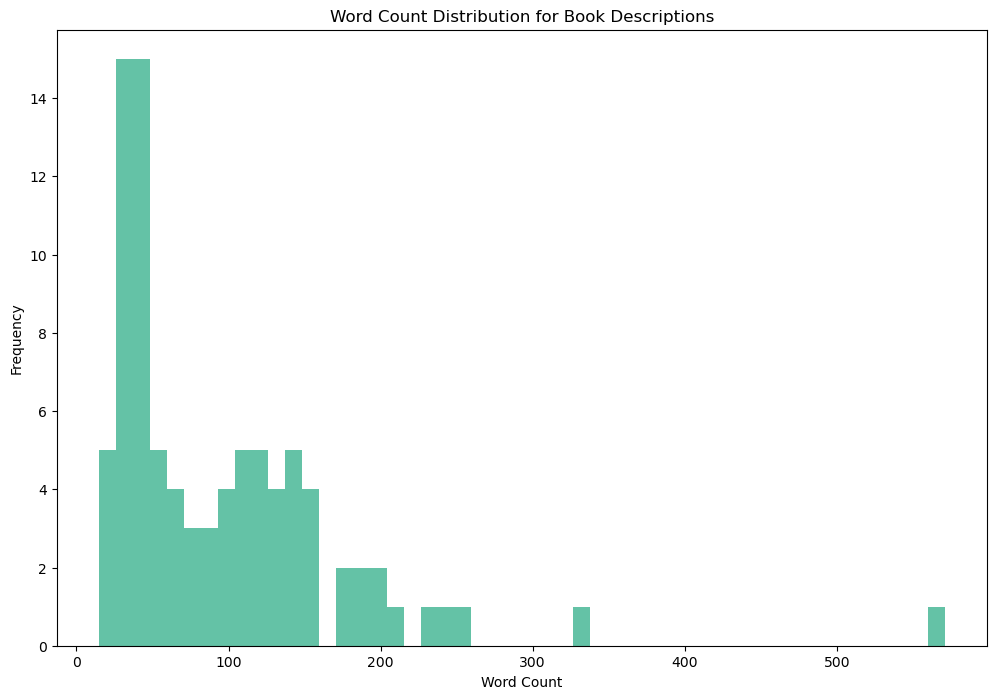

In [24]:
# Calculate the word count for book descriptions
df['word_count'] = df['Description'].apply(lambda x: len(str(x).split()))

# Plotting the word count distribution
df['word_count'].plot(
    kind='hist',
    bins=50,
    figsize=(12, 8),
    title='Word Count Distribution for Book Descriptions',
    color='#64C2A6')  

# Label the x-axis and y-axis
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.savefig('word_count_distribution.png')

# Show the plot
plt.show()

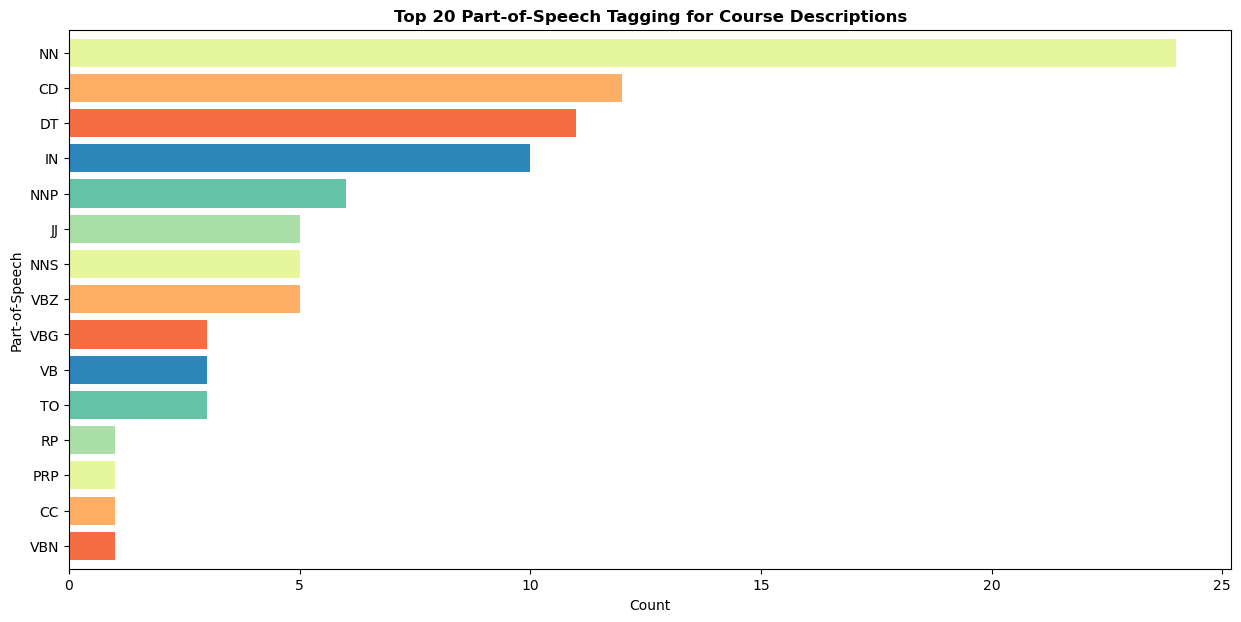

In [25]:
plt.figure(figsize=(15, 7))

# Define the color palette
colors = ['#F66D44', '#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6', '#2D87BB']

# Perform part-of-speech tagging
blob = TextBlob(str(df['Description']))
pos_df = pd.DataFrame(blob.tags, columns=['word', 'pos'])
pos_counts = pos_df['pos'].value_counts()[:20]

# Sort the pos_counts in descending order
pos_counts = pos_counts.sort_values(ascending=True)

# Plotting the top 20 part-of-speech tagging with different colors for each bar
bar_width = 0.8  # Adjust the bar width
ax = pos_counts.plot(kind='barh', color=colors, width=bar_width)

# Set the title
ax.set_title("Top 20 Part-of-Speech Tagging for Course Descriptions", fontweight="bold")

# Label the y-axis and x-axis
plt.ylabel('Part-of-Speech')
plt.xlabel('Count')

plt.savefig('art-of-Speech Tagging.png')

# Show the plot
plt.show()

<Figure size 1500x700 with 0 Axes>

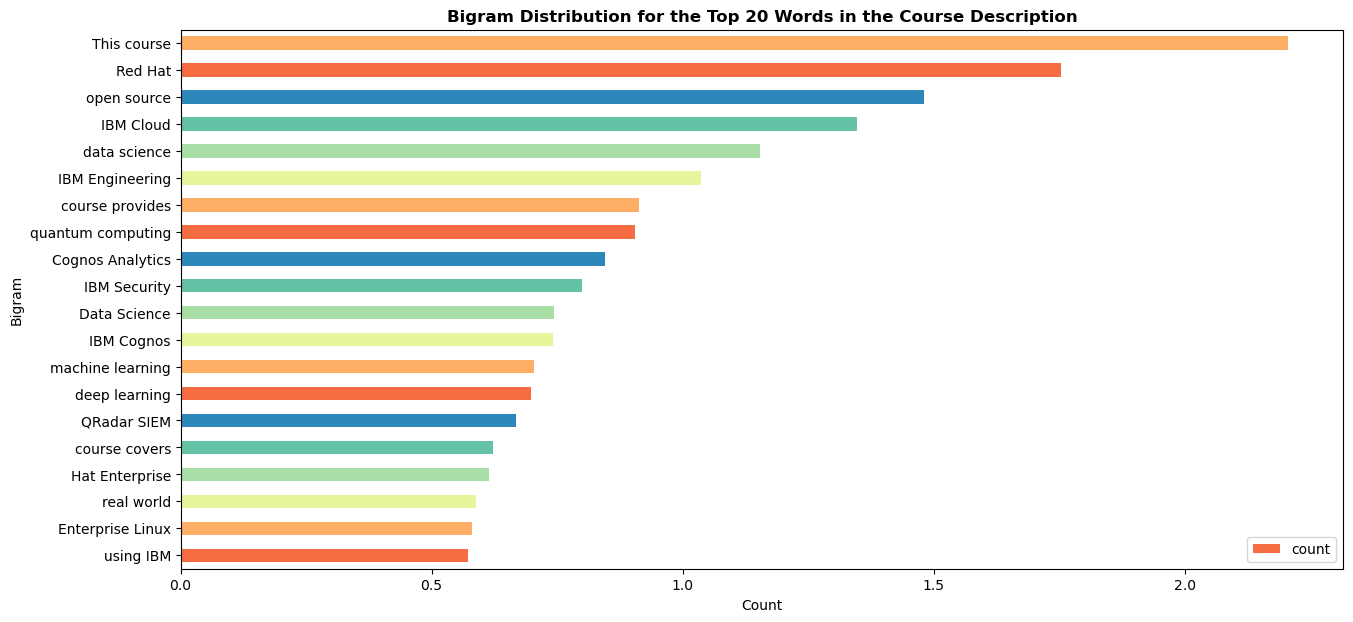

In [57]:
plt.figure(figsize=(15, 7))

# Define the color palette
light_colors = ['#F66D44', '#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6', '#2D87BB']

# Converting course descriptions into vectors using TF-IDF using Bigram
tfv = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase=False)
tfidf_matrix = tfv.fit_transform(df['Description'])
total_words = tfidf_matrix.sum(axis=0)

# Calculate the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tfv.vocabulary_.items()]
freq = sorted(freq, key=lambda x: x[1], reverse=True)

bigram = pd.DataFrame(freq)
bigram.rename(columns={0: 'bigram', 1: 'count'}, inplace=True)

# Consider top 20 records
bigram = bigram.head(20)

# Sort the bigram dataframe by the 'count' column in decreasing order
bigram = bigram.sort_values(by='count', ascending=True)

# Plot the bigram distribution with the specified color palette and grid lines
ax = bigram.plot(x='bigram', y='count', kind='barh', color=light_colors, title="Bigram distribution for the top 20 words in the course description", figsize=(15, 7))

# Set the title
ax.set_title("Bigram Distribution for the Top 20 Words in the Course Description", fontweight="bold")

# Label the x-axis and y-axis
plt.xlabel('Count')
plt.ylabel('Bigram')

# Show the plot
plt.show()

<Figure size 1500x700 with 0 Axes>

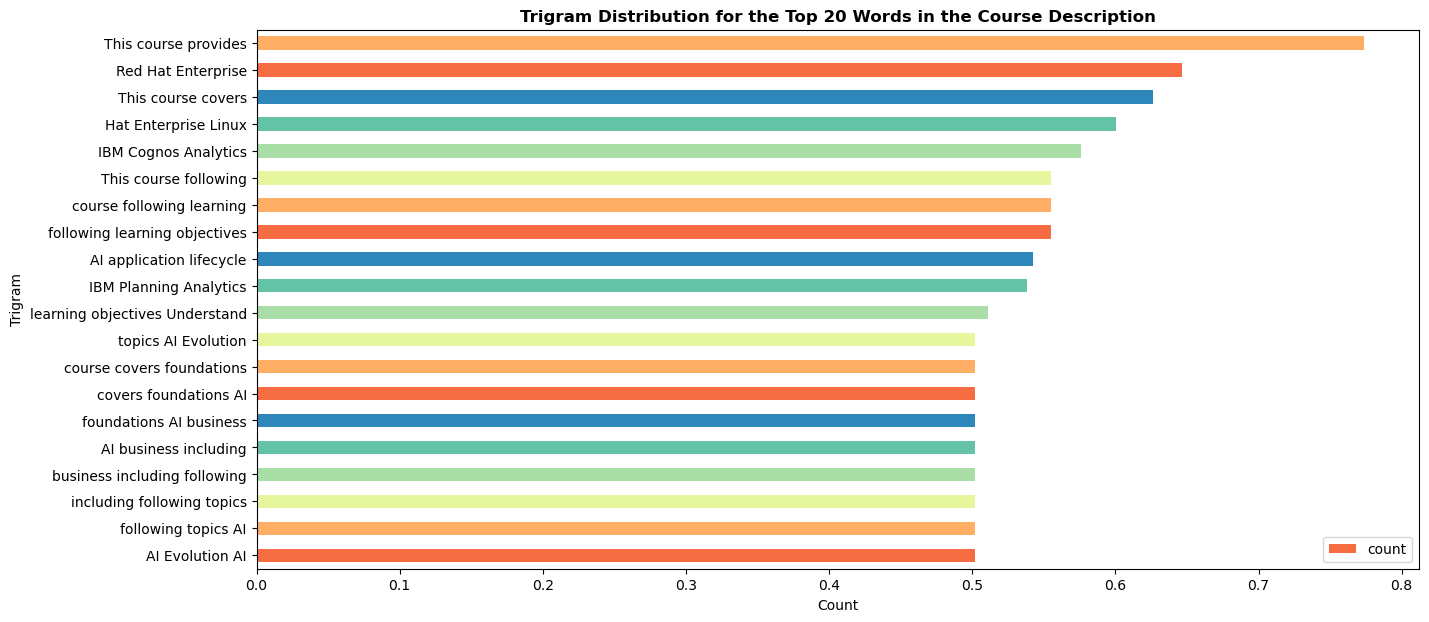

In [59]:
plt.figure(figsize=(15, 7))

# Define the color palette
light_colors = ['#F66D44', '#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6', '#2D87BB']

# Converting course descriptions into vectors using TF-IDF using Trigram
tfv = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase=False)
tfidf_matrix = tfv.fit_transform(df['Description'])
total_words = tfidf_matrix.sum(axis=0)


# Calculate the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tfv.vocabulary_.items()]
freq = sorted(freq, key=lambda x: x[1], reverse=True)

trigram = pd.DataFrame(freq)
trigram.rename(columns={0: 'trigram', 1: 'count'}, inplace=True)

# Consider top 20 records
trigram = trigram.head(20)

# Sort the bigram dataframe by the 'count' column in decreasing order
trigram = trigram.sort_values(by='count', ascending=True)

# Plotting the trigram distribution with the specified color palette and horizontal orientation
ax = trigram.plot(x='trigram', y='count', kind='barh', color=light_colors,
                  title="Trigram distribution for the top 20 words in the course description", figsize=(15, 7))

# Set the title
ax.set_title("Trigram Distribution for the Top 20 Words in the Course Description", fontweight="bold")

# Label the y-axis and x-axis
plt.xlabel('Count')
plt.ylabel('Trigram')

# Show the plot
plt.show()

# Text Preprocessing

In [6]:
#Utitlity functions for removing ASCII characters, converting lower case, removing stop words, html and punctuation from description

def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

from nltk.stem import WordNetLemmatizer
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

In [7]:
df['cleaned_desc'] = df['Description'].apply(_removeNonAscii)

df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)
df['cleaned_desc'] = df.cleaned_desc.apply(func=lemmatize_words)

In [65]:
# Example of pre-processing
print('Original: ',df.Description[43])
print('\nProcessed: ', df.cleaned_desc[43])

Original:  Learn how to build, deploy and scale real-world solutions on IBM Cloud. These guides provide step-by-step instructions on how to use IBM Cloud to implement common patterns based on best practices and proven technologies.IBM Cloud CLI - the command line interface to interact with IBM Cloud API. Docker - to deliver and run software in packages called containers. kubectl - a command line interface for running commands against Kubernetes clusters. oc - manages OpenShift applications, and provides tools to interact with each component of your system. Helm 3 - helps you manage Kubernetes applications  Helm Charts help you define, install, and upgrade even the most complex Kubernetes application. Terraform - automates your resource provisioning. jq - a lightweight and flexible command-line JSON processor. Git - a free and open source distributed version control system.

Processed:  learn build deploy scale real world solutions ibm cloud guides provide step by step instructions use

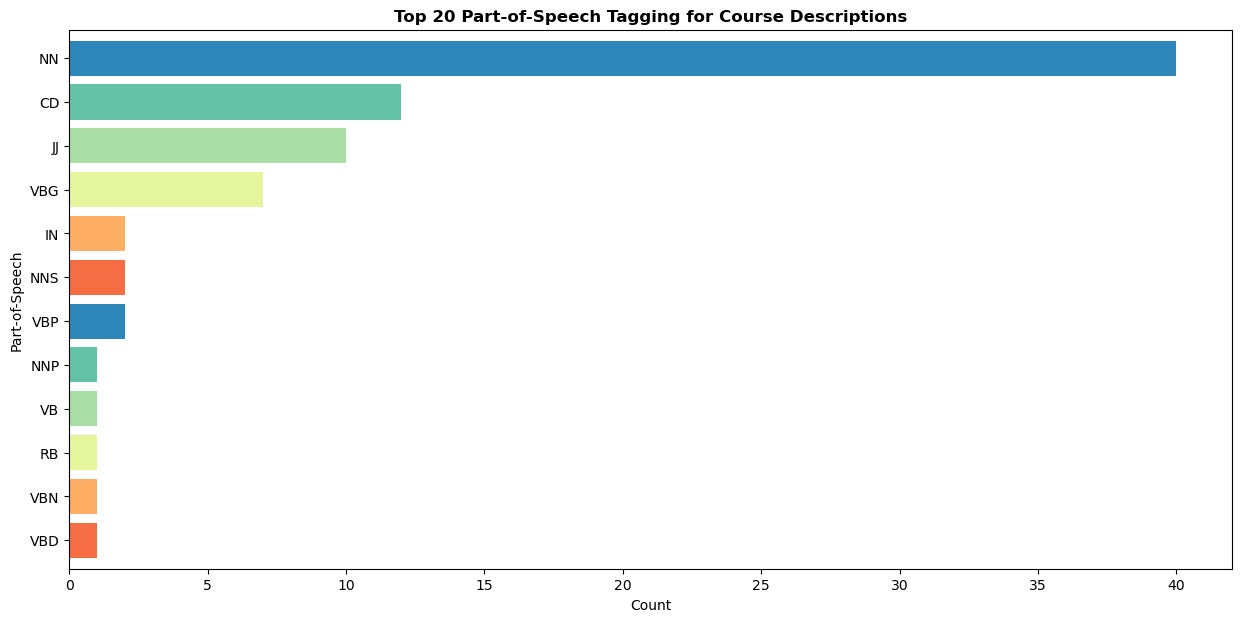

In [26]:
plt.figure(figsize=(15, 7))

# Define the color palette
colors = ['#F66D44', '#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6', '#2D87BB']

# Perform part-of-speech tagging
blob = TextBlob(str(df['cleaned_desc']))
pos_df = pd.DataFrame(blob.tags, columns=['word', 'pos'])
pos_counts = pos_df['pos'].value_counts()[:20]

# Sort the pos_counts in descending order
pos_counts = pos_counts.sort_values(ascending=True)

# Plotting the top 20 part-of-speech tagging with different colors for each bar
bar_width = 0.8  # Adjust the bar width
ax = pos_counts.plot(kind='barh', color=colors, width=bar_width)

# Set the title
ax.set_title("Top 20 Part-of-Speech Tagging for Course Descriptions", fontweight="bold")

# Label the y-axis and x-axis
plt.ylabel('Part-of-Speech')
plt.xlabel('Count')

plt.savefig('art-of-Speech Tagging.png')

# Show the plot
plt.show()

<Figure size 1500x700 with 0 Axes>

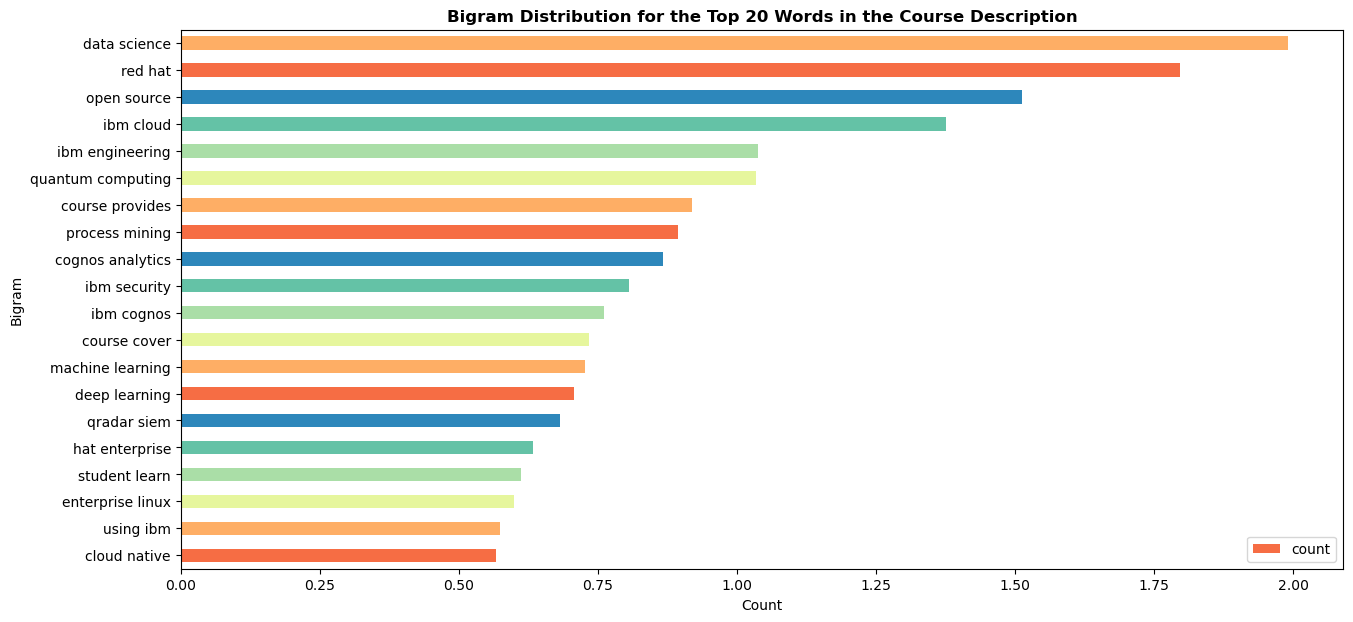

In [27]:
plt.figure(figsize=(15, 7))

# Define the color palette
light_colors = ['#F66D44', '#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6', '#2D87BB']

# Converting course descriptions into vectors using TF-IDF using Bigram
tfv = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase=False)
tfidf_matrix = tfv.fit_transform(df['cleaned_desc'])
total_words = tfidf_matrix.sum(axis=0)

# Calculate the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tfv.vocabulary_.items()]
freq = sorted(freq, key=lambda x: x[1], reverse=True)

bigram = pd.DataFrame(freq)
bigram.rename(columns={0: 'bigram', 1: 'count'}, inplace=True)

# Consider top 20 records
bigram = bigram.head(20)

# Sort the bigram dataframe by the 'count' column in decreasing order
bigram = bigram.sort_values(by='count', ascending=True)

# Plot the bigram distribution with the specified color palette and grid lines
ax = bigram.plot(x='bigram', y='count', kind='barh', color=light_colors, title="Bigram distribution for the top 20 words in the course description", figsize=(15, 7))

# Set the title
ax.set_title("Bigram Distribution for the Top 20 Words in the Course Description", fontweight="bold")

# Label the x-axis and y-axis
plt.xlabel('Count')
plt.ylabel('Bigram')

plt.savefig('Bigram.png')
# Show the plot
plt.show()

# Visulaize the Processed Dataset

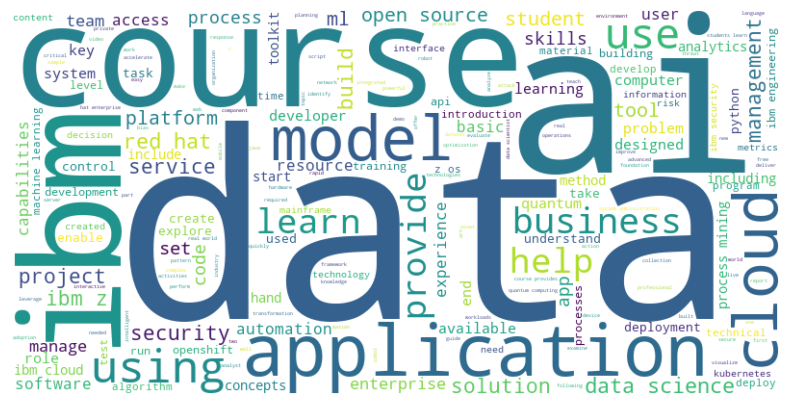

In [66]:
# Generate word cloud
text = " ".join(df['cleaned_desc'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

In [19]:
# Save the clean dataset to a CSV file
df.to_csv('clean_data.csv', index=False)

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Read the file
df = pd.read_csv("data_preprocess.csv", encoding="latin-1")
print("Loaded data file {0} with {1} rows and {2} columns".format("data_preprocess.csv"
                                                                  ,df.shape[0]
                                                                  ,df.shape[1]))

df.head()

Loaded data file data_preprocess.csv with 89 rows and 5 columns


,Course,Type,Sub-topics,Description,Link
0,Artificial Intelligence,Courseware,Getting Started with Enterprise-grade AI,This course covers the foundations of AI for b...,https://skillsbuild.org/college-students/digit...
1,Artificial Intelligence,Courseware,OpenDS4All,OpenDS4All is a project created to accelerate ...,https://github.com/odpi/OpenDS4All/tree/master...
2,Artificial Intelligence,Courseware,IBM AI Education,Dive into this introductory course and get fam...,https://www.mindspark.org/ibm-ai
3,Artificial Intelligence,Courseware,Watson Academy,"IBMs portfolio of business-ready tools, appli...",https://www.ibm.com/training/artificial-intell...
4,Artificial Intelligence,Courseware,Create a Node-RED starter application,A flow-based programming tool for wiring toget...,https://developer.ibm.com/components/node-red/


In [25]:
# Combine relevant columns into a single string for vectorization
df['combined_text'] = df['Course'] + ' ' + df['Type'] + ' ' + df['Sub-topics'] + ' ' + df['Description']

# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['combined_text'])

In [26]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


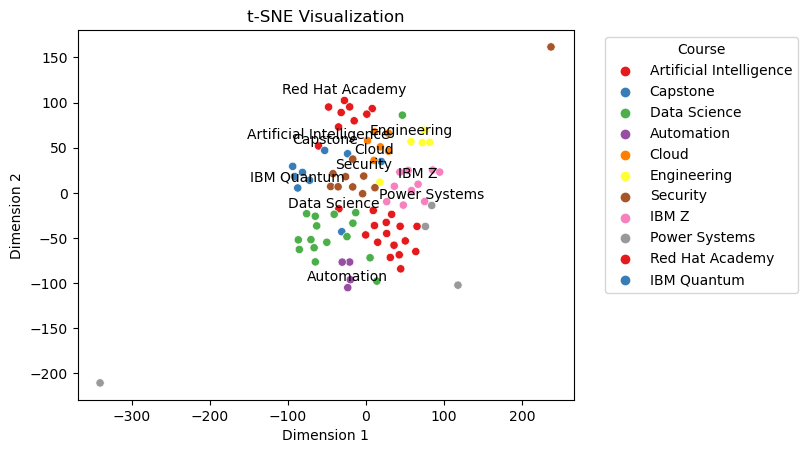

In [27]:
# Create a scatter plot with different colors
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Course'], palette='Set1')
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Label one representative point for each cluster
unique_courses = df['Course'].unique()
for course in unique_courses:
    course_points = df[df['Course'] == course]
    representative_point = X_tsne[df['Course'] == course][0]
    plt.annotate(course, representative_point, textcoords="offset points", xytext=(0, 5), ha='center')

# Place the legend outside the plot
plt.legend(title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('tsne.png')
plt.show()

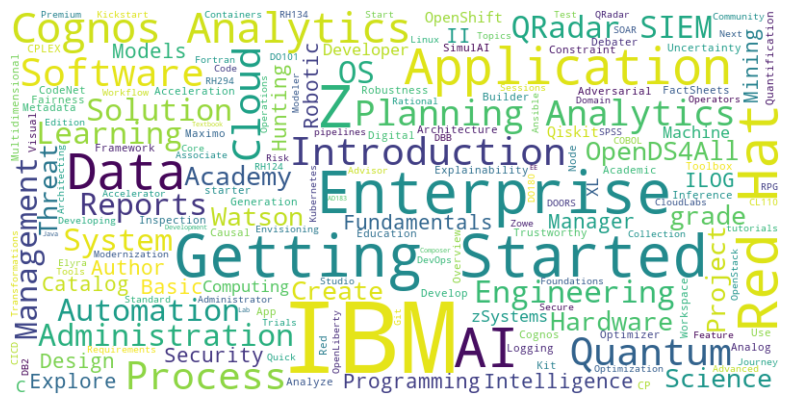

In [68]:
# Concatenate 'Description' values into a single string
text = " ".join(df['Sub-topics'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

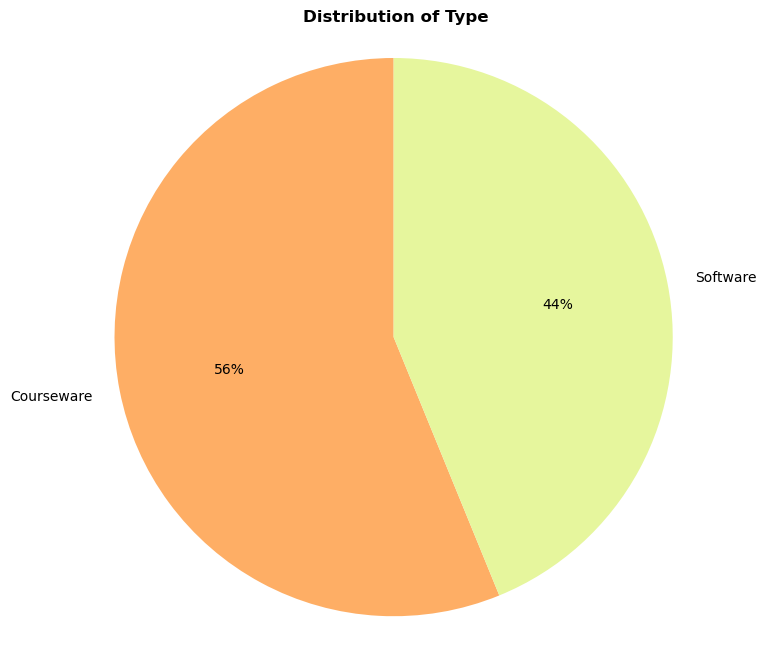

In [28]:
# Define the Type distribution
type_counts = df['Type'].value_counts()

# Define the color palette
type_colors = ['#FEAE65', '#E6F69D']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, colors=type_colors, autopct='%1.0f%%', startangle=90)
plt.title('Distribution of Type', fontweight='bold')

# Set aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')

plt.savefig('type.png')

# Show the plot
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

text = " ".join(df['cleaned_desc'])

# Create TfidfVectorizer to calculate TF-IDF scores
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([text])


feature_names = tfidf_vectorizer.get_feature_names()
tfidf_scores = tfidf_matrix.toarray()[0]


scores_df = pd.DataFrame({'Word': feature_names,
                          'TF-IDF': tfidf_scores})


scores_df = scores_df.sort_values(by='TF-IDF', ascending=False)


top_words = scores_df.head(5)
print(top_words)


       Word    TF-IDF
361    data  0.353258
698     ibm  0.343354
332  course  0.237707
70       ai  0.214596
243   cloud  0.204692
